### Deep Neural Network Fundamental With Weight Initialization

#### Import Basic Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf               # backend
from tensorflow import keras          # frontend
from keras import Sequential          # architecture
from keras.layers import Dense        # fully connected
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

#### Import Dataset

In [2]:
df = pd.read_csv('C:\\Users\\Lenovo\\Downloads\\Social_Network_Ads.csv')

In [3]:
df.head(2)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000.0,0
1,15810944,Male,35.0,20000.0,0


#### Shape

In [4]:
df.shape

(400, 5)

#### We just considering only Gender , Age , EstimatedSalary , Purchased features.

In [5]:
df = df.iloc[: , 1:]

In [6]:
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19.0,19000.0,0
1,Male,35.0,20000.0,0
2,Female,26.0,43000.0,0
3,Female,27.0,57000.0,0
4,Male,19.0,76000.0,0


In [7]:
df['Gender'] = df['Gender'].astype('category')

In [8]:
df['Gender'] = df['Gender'].cat.codes

In [9]:
df

,Gender,Age,EstimatedSalary,Purchased
0,1,19.0,19000.0,0
1,1,35.0,20000.0,0
2,0,26.0,43000.0,0
3,0,27.0,57000.0,0
4,1,19.0,76000.0,0
...,...,...,...,...
395,0,46.0,41000.0,1
396,1,51.0,23000.0,1
397,0,50.0,20000.0,1
398,1,36.0,33000.0,0


#### Check Missing Data

In [10]:
df.isnull().sum()

Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

##### Insights : There is no any missing value

#### Data split into independent and dependent variable

In [11]:
x = df.iloc[: , :-1]

In [12]:
y = df.iloc[: , -1]

In [13]:
x.head(2)

,Gender,Age,EstimatedSalary
0,1,19.0,19000.0
1,1,35.0,20000.0


In [14]:
y.head(2)

0    0
1    0
Name: Purchased, dtype: int64

#### Split the data into train and test

In [15]:
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.2 , random_state = 1 , stratify = y)

In [16]:
print(x_train.shape , x_test.shape , y_train.shape , y_test.shape)

(320, 3) (80, 3) (320,) (80,)


## MultiLayer Perceptron (DNN / ANN) without Feature Scaling

#### If your ask is more than one means output is more than one  then use functional and sequential is for ask is for one  

#### Use Sequential architecture

In [17]:
dnn = Sequential()

#### Hidden Layer 1

#### Activation function is use in two cases only 
#### 1.Hidden Layer
#### 2.Output Layer

#### When in hidden layer we always use relu as activation function

In [18]:
dnn.add(Dense(128 , activation = 'relu'  , input_dim = 3 ))

#### weight = 128 * 3 
#### Bias = 128

#### (128 * 3) + 128 = 512

#### Hidden Layer 2

In [19]:
dnn.add(Dense(128 , activation = 'relu'))

#### Weight = 128 * 128
#### Bias = 128

#### (128 * 128) + 128 = 16 , 512

#### Output Layer

#### Output Layer always use activation function is sigmoid because output is 1 only.

In [20]:
dnn.add(Dense(1 , activation = 'sigmoid'))

#### Weight = 128 *1 
#### Bias = 1

#### (128 * 1)  + 1 = 129

#### Total Parameters = 512 + 16 , 512 + 129  = 17153

In [21]:
dnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 17,153 (67.00 KB)

 Trainable params: 17,153 (67.00 KB)

 Non-trainable params: 0 (0.00 B)

#### Compile the DNN model

#### By default use adam as optimizer

#### optimization means performance get increase very fast

In [22]:
dnn.compile(optimizer = 'adam' , loss = 'binary_crossentropy' , metrics = ['accuracy'])

#### Binary Crossentropy is the synonym of log loss func. (it is loss func in classification )

#### Fit the DNN model without scaled data

#### Epochs means iteration
#### 1 epoch = 1 backprop + 1 forwordprop

In [23]:
history_without_feature_scaling =  dnn.fit(x_train , y_train , validation_data = (x_test , y_test) , epochs = 100)

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 167ms/step - accuracy: 0.5411 - loss: 968.9222 - val_accuracy: 0.6375 - val_loss: 1003.0342
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5597 - loss: 746.4879 - val_accuracy: 0.6375 - val_loss: 1194.6245
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5977 - loss: 1083.6503 - val_accuracy: 0.3625 - val_loss: 1650.3981
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4244 - loss: 895.9165 - val_accuracy: 0.3625 - val_loss: 419.8177
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4421 - loss: 333.4675 - val_accuracy: 0.3625 - val_loss: 251.5961
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4869 - loss: 172.2566 - val_accuracy: 0.3625 - val_loss: 74.1502
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4976 - loss: 83.0702 - val_accuracy: 0.6375 - val_loss: 176.9867
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5136 - loss: 

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5670 - loss: 287.5967 - val_accuracy: 0.3625 - val_loss: 120.9174
Epoch 100/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5406 - loss: 167.4476 - val_accuracy: 0.6375 - val_loss: 97.6254


In [24]:
history_without_feature_scaling

#### Insights : We get very poor training and testing accuracy because of without feature scaling

## Case 2 : Mutltilayer Perceptron (DNN / ANN) with Feature Scaling

In [25]:
scaler = StandardScaler()

In [26]:
x_train_scaled = scaler.fit_transform(x_train)

In [27]:
x_test_scaled = scaler.transform(x_test)

#### Build DNN Model

In [28]:
dnn = Sequential()

#### Hidden Layer 1

#### We using relu as activation function
#### When relu is use as activation function then kernel_initializer will be He-Initializer.
#### When Sigmoid and tanhyperbolic is use as activation function then kernel_initializer will be glorate_uniform or glorate normal
#### Kernel Initializer is nothing but weight Initializer
#### Weight Initializer for first time only because after that backpropogation update the new weights

In [29]:
dnn.add(Dense(128 , activation = 'relu' , input_dim = 3 , kernel_initializer='he_normal'))

#### Hidden Layer 2

#### We using relu as activation function
#### When relu is use as activation function then kernel_initializer will be He-Initializer.
#### When Sigmoid and tanhyperbolic is use as activation function then kernel_initializer will be glorate_uniform or glorate normal
#### Kernel Initializer is nothing but weight Initializer

In [30]:
dnn.add(Dense(128 , activation = 'relu' , kernel_initializer = 'he_normal'))

#### Output Layer

#### We using Sigmoid as activation function because this layer is output layer and this problem statement is binary classification so we use sigmoid . if multiclass classification problem statement then use softmax activation function
#### When Sigmoid and tanhyperbolic is use as activation function then kernel_initializer will be glorate_uniform or glorate normal
#### glorate_normal or glorate_uniform is by default

In [31]:
dnn.add(Dense(1 , activation = 'sigmoid' , kernel_initializer = 'glorot_uniform'))

#### Summary

In [32]:
dnn.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 128)                 │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 17,153 (67.00 KB)

 Trainable params: 17,153 (67.00 KB)

 Non-trainable params: 0 (0.00 B)

#### Compile the DNN model

In [33]:
dnn.compile(optimizer = 'adam' , loss = 'binary_crossentropy' , metrics = ['accuracy'])

#### Fit the DNN model with scaled data

In [34]:
history_with_feature_scaling = dnn.fit(x_train_scaled , y_train , validation_data = (x_test_scaled , y_test) , epochs = 100)

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.6641 - loss: 1.0053 - val_accuracy: 0.8500 - val_loss: 0.5507
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8655 - loss: 0.3446 - val_accuracy: 0.8625 - val_loss: 0.5140
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9114 - loss: 0.2793 - val_accuracy: 0.8625 - val_loss: 0.4711
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8998 - loss: 0.2670 - val_accuracy: 0.8625 - val_loss: 0.4588
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9058 - loss: 0.2274 - val_accuracy: 0.8625 - val_loss: 0.4702
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9197 - loss: 0.2041 - val_accuracy: 0.8750 - val_loss: 0.4366
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9351 - loss: 0.1818 - val_accuracy: 0.8625 - val_loss: 0.4591
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9353 - loss: 0.1921 - val_accuracy: 0.8625

#### Insights : 

#### 1. performance without feature scaling is training accuracy  : 0.4397  and testing accuracy is val_accuracy: 0.6375 
#### 2. performance with feature scaling and with weight initializer is training accuracy  : 0.9497  and testing accuracy is val_accuracy: 0.8875

#### You must need to do feature scaling in DNN for better performance

#### Weight values of DNN model

In [35]:
dnn.get_weights()

[array([[-0.06687543, -0.48905134,  1.4418443 , -0.04300503,  1.3622063 ,
         -0.84628856, -1.3999393 , -0.06949331, -0.12282033,  0.33411992,
          0.17335485,  0.75179195, -1.1528227 ,  0.5743752 ,  0.42378786,
          0.93185323,  0.4768335 ,  0.39265618,  0.16563894, -0.396044  ,
          0.44283134,  1.4757266 , -0.05991428, -0.20867483,  1.6932392 ,
          1.0373856 , -0.13839795, -0.13832338,  0.43144733,  0.0543253 ,
          0.44003823, -1.1423404 ,  0.09638594, -0.05161387, -0.6366404 ,
         -0.96183056, -0.7919222 ,  0.08241702,  0.09714081, -0.10270777,
         -0.24670024, -1.1268618 ,  0.24292983, -0.94668657, -0.12186126,
         -0.94476897, -0.8236492 , -1.3598318 ,  0.5544606 ,  1.8427491 ,
         -1.6985868 ,  0.8665779 , -1.37908   ,  0.5624222 , -0.4881173 ,
         -1.6321722 ,  0.39588234,  0.7063077 , -1.1610163 ,  0.16285102,
         -0.9004177 ,  0.28467247,  1.2420475 ,  1.5487298 , -0.53585947,
         -1.4671533 ,  1.6750392 ,  0.

#### Plot DNN Model

In [36]:
history_with_feature_scaling

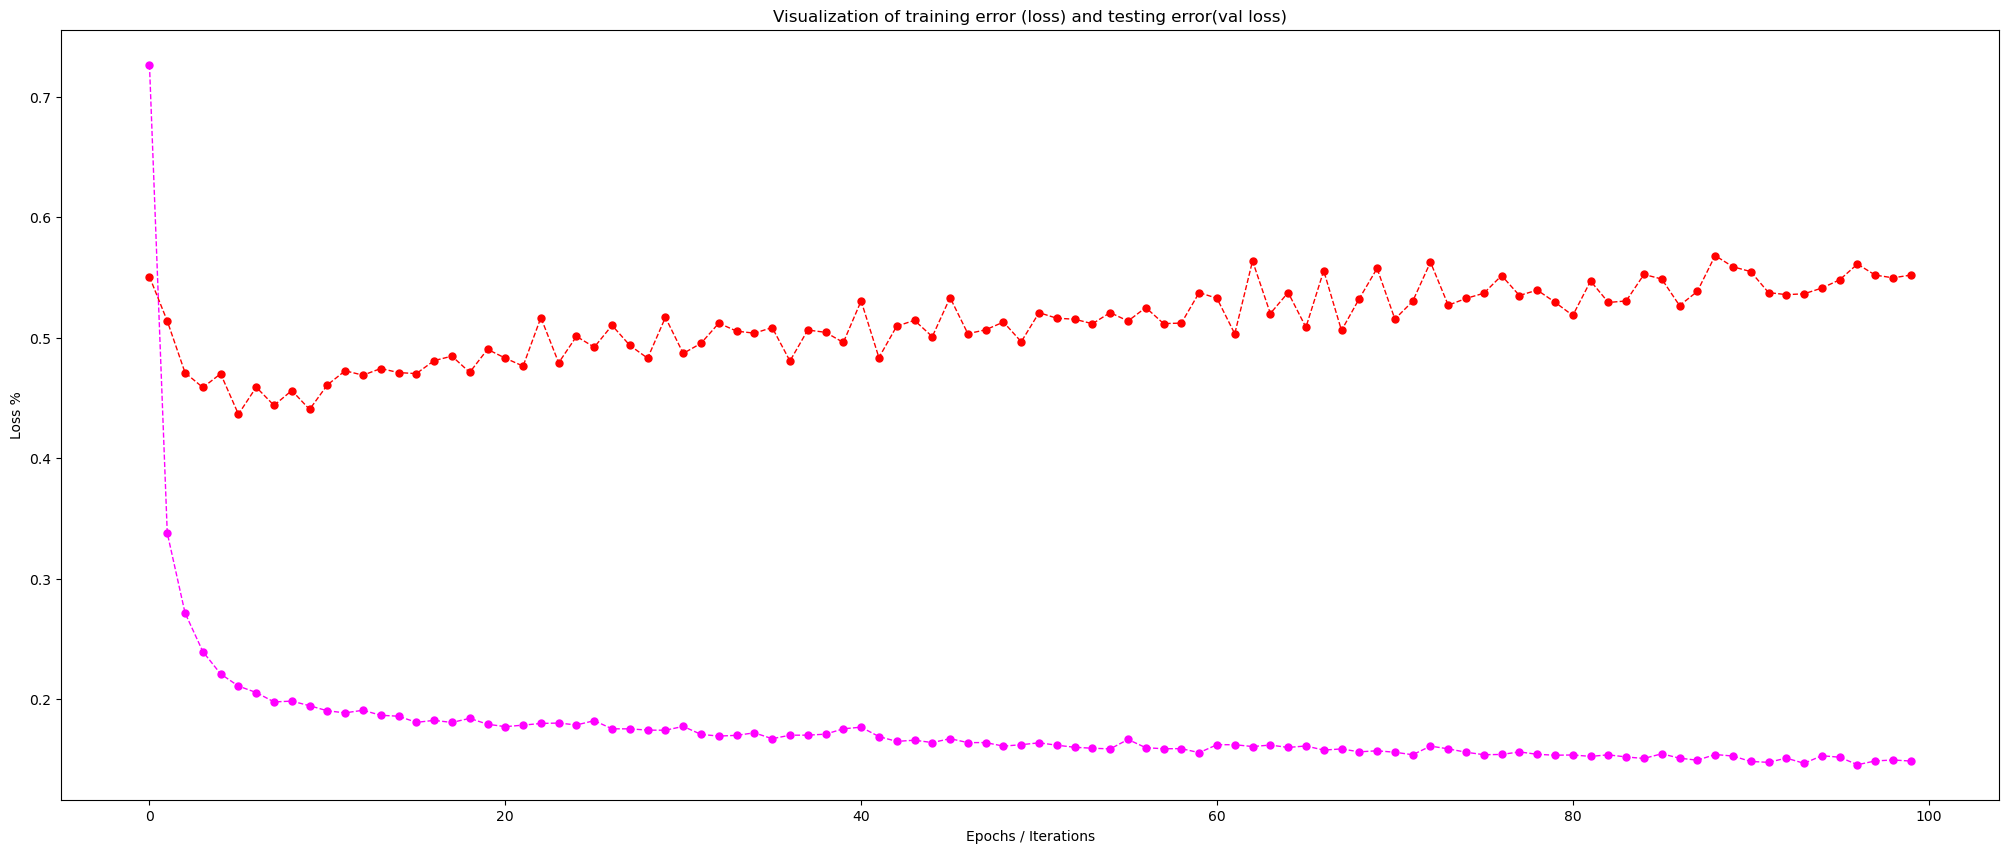

In [37]:
plt.figure(figsize = (25 , 10))
plt.plot(history_with_feature_scaling.history['loss'] , color='magenta', marker='o',
         linestyle='dashed',linewidth=1, markersize=5)    # Training Error
plt.plot(history_with_feature_scaling.history['val_loss'] , color='red', marker='o',
         linestyle='dashed',linewidth=1, markersize=5) # Testing Error
plt.xlabel('Epochs / Iterations')
plt.ylabel('Loss %')
plt.title('Visualization of training error (loss) and testing error(val loss)')
plt.show()

#### Insights : Training Error is gradually decreasing from first epoch to 100 epoch . At 100th epoch it reaches to 0.1.
#### Testing Error is gradually increasing from first epoch to 100 epoch . At 100th epoch it reaches about 0.5

## Regularization method

#### Regularization method is basically use for to avoid overfitting from your model

#### Kernel regularizer is the regularization methood 

#### we using Lasso regularization (L1)

#### Regularization happened layer wise (In hidden layers)

#### The value 0.001 in keras.regularizers.l1(0.001) represents the regularization strength. It controls the penalty applied to the model's weights during training to prevent overfitting. A value of 0.001 means a relatively small penalty for large weights

In [54]:
dnn.add(Dense(128 , activation = 'relu' , input_dim = 3 , kernel_initializer='he_normal' , 
              kernel_regularizer = keras.regularizers.l1(0.001)))
dnn.add(Dense(128 , activation = 'relu' , kernel_initializer = 'he_normal' ,
              kernel_regularizer = keras.regularizers.l1(0.001)))
dnn.add(Dense(1 , activation = 'sigmoid' , kernel_initializer = 'glorot_uniform'))
dnn.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 128)                 │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │             129 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │             129 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 128)                 │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 1)                   │             129 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 128)                 │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 1)                   │             129 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 128)                 │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 1)                   │             129 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 128)                 │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 320,658 (1.22 MB)

 Trainable params: 118,150 (461.52 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 202,508 (791.05 KB)

In [55]:
dnn.compile(optimizer = 'adam' , loss = 'binary_crossentropy' , metrics = ['accuracy'])
history_with_feature_scaling_regularizer = dnn.fit(x_train_scaled , y_train , validation_data = (x_test_scaled , y_test) , epochs = 100)

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 8s 70ms/step - accuracy: 0.5370 - loss: 3.2521 - val_accuracy: 0.8750 - val_loss: 3.2645
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9629 - loss: 2.9605 - val_accuracy: 0.9000 - val_loss: 3.1281
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9593 - loss: 2.7641 - val_accuracy: 0.8750 - val_loss: 2.8860
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9625 - loss: 2.6020 - val_accuracy: 0.8875 - val_loss: 2.8137
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9605 - loss: 2.4078 - val_accuracy: 0.8750 - val_loss: 2.6736
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9541 - loss: 2.2773 - val_accuracy: 0.8750 - val_loss: 2.4771
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9550 - loss: 2.1267 - val_accuracy: 0.8875 - val_loss: 2.3846
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9787 - loss: 1.9605 - val_accuracy: 0.

#### Visualization of Training error(loss) and Testing error (val loss) with reularization method

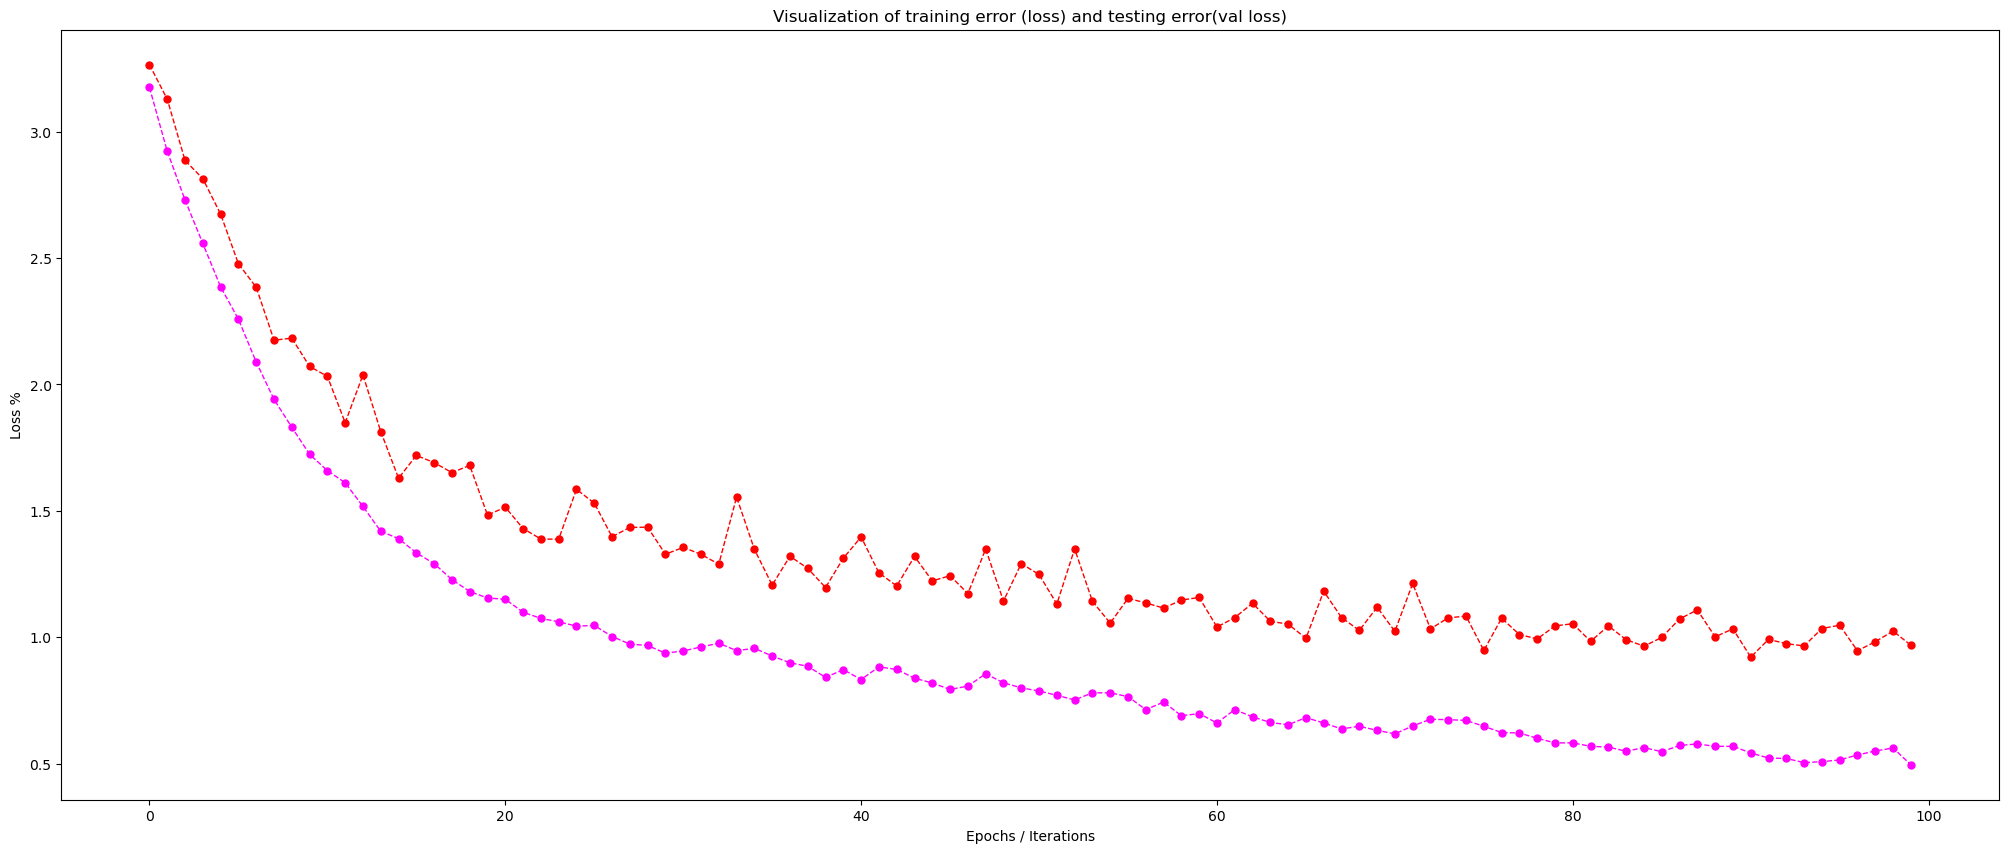

In [56]:
plt.figure(figsize = (25 , 10))
plt.plot(history_with_feature_scaling_regularizer.history['loss'] , color='magenta', marker='o',
         linestyle='dashed',linewidth=1, markersize=5)    # Training Error
plt.plot(history_with_feature_scaling_regularizer.history['val_loss'] , color='red', marker='o',
         linestyle='dashed',linewidth=1, markersize=5) # Testing Error
plt.xlabel('Epochs / Iterations')
plt.ylabel('Loss %')
plt.title('Visualization of training error (loss) and testing error(val loss)')
plt.show()

#### Insights : 

#### Training Error is gradually decreasing from first epoch to 100 epoch . At 100th epoch it reaches to loss: 0.2732.
#### Testing Error is also gradually decreasing from first epoch to 100 epoch . At 100th epoch it reaches about val_loss: 0.6449

#### Without regularization testing error is high means it gradually increasing but in regularization method it gradually decreasing

### Visualization of Training accuracy (accuracy) and testing accuracy(val accuracy)

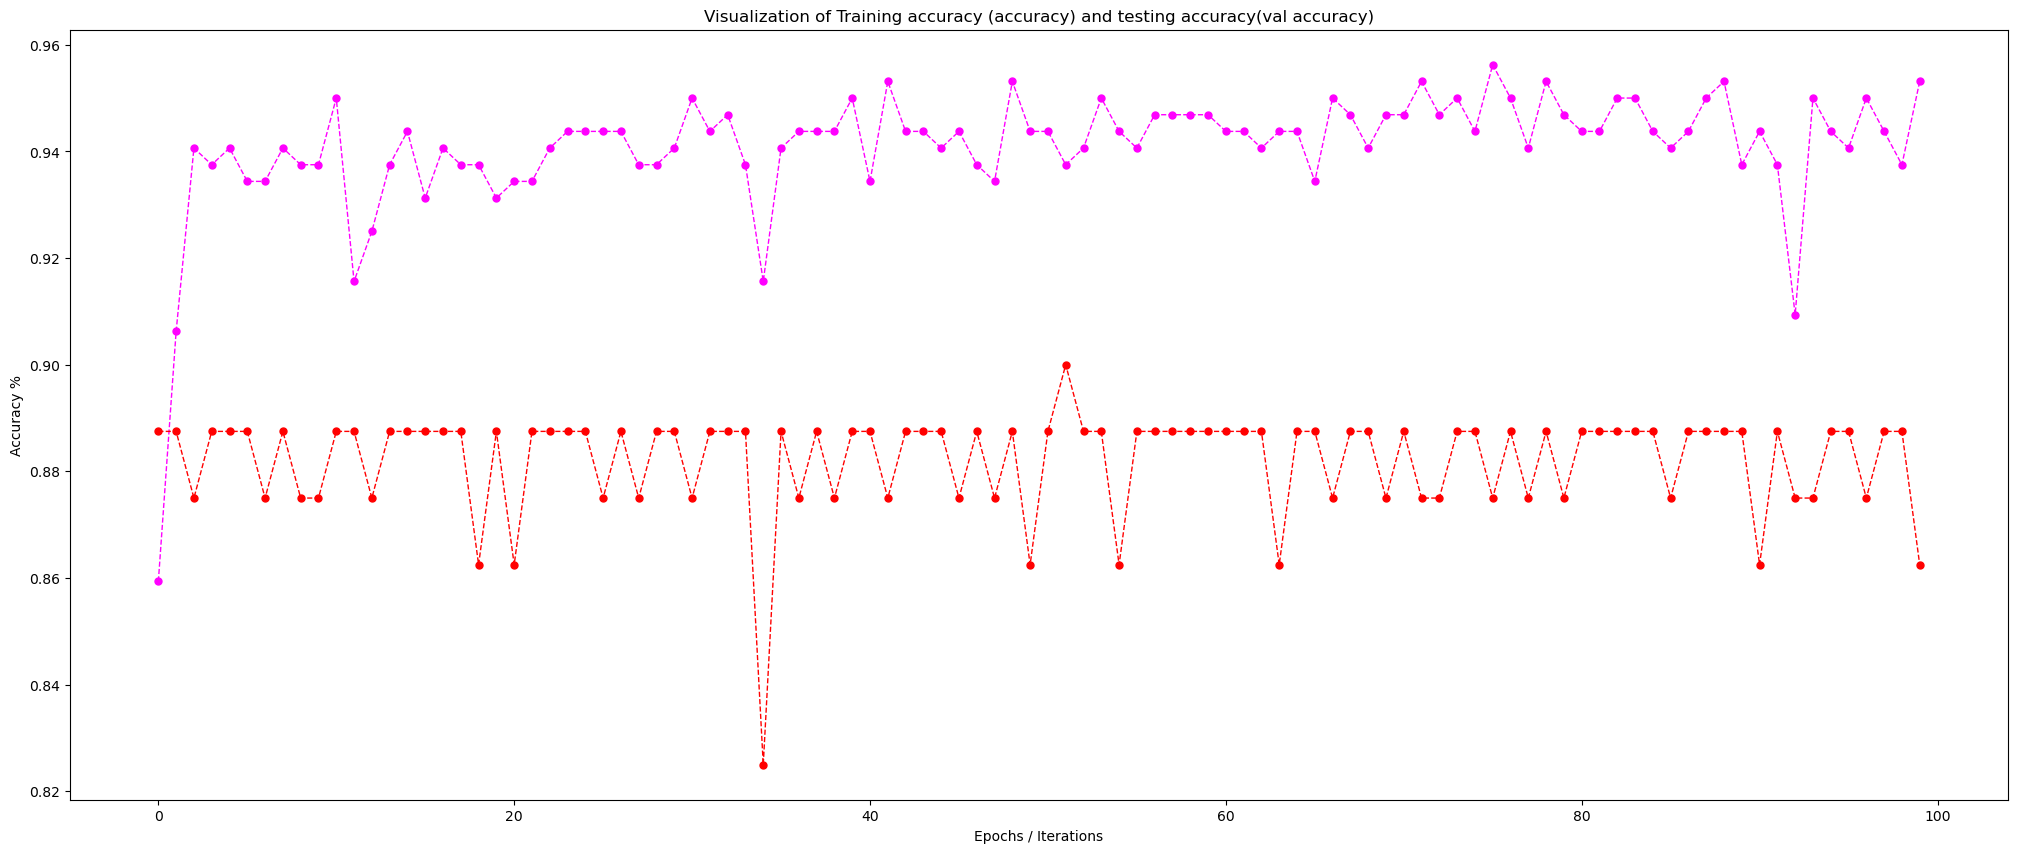

In [44]:
plt.figure(figsize = (25 , 10))
plt.plot(history_with_feature_scaling_regularizer.history['accuracy'] , color='magenta', marker='o',
         linestyle='dashed',linewidth=1, markersize=5)    # Training accuracy
plt.plot(history_with_feature_scaling_regularizer.history['val_accuracy'] , color='red', marker='o',
         linestyle='dashed',linewidth=1, markersize=5) # Testing accuracy
plt.xlabel('Epochs / Iterations')
plt.ylabel('Accuracy %')
plt.title('Visualization of Training accuracy (accuracy) and testing accuracy(val accuracy)')
plt.show()

#### Insights : Last epoch variance is approximate 9 % in training(accuracy) and testing accuracy(val accuracy)